# givebirth调用次数分布

In [138]:
import pandas as pd
import numpy as np
import numpy as np
import csv    #加载csv包便于读取csv文件
import zipfile
import os
import json
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("/mnt/sde1/geth/nft_analyse_v1/data/giveBirth/csv/givebirth_withRevenue.csv")
temp=df["rewardCount"].value_counts()
temp

1     1379
2       46
10      20
5        7
3        6
6        4
7        4
4        2
9        2
Name: rewardCount, dtype: int64

In [139]:
x = np.arange(11)
y=[0]*11
for key in temp.keys():
    value=temp[key]
    y[key]=int(value)

x=x[1:]
y=y[1:]
averageRevenueList=[]

print(x)
print(y)

for index in x:
    tempDf=df[df["rewardCount"]==index]
    totalRevenue=sum(tempDf["revenue_dollar"])
    length=len(tempDf)
    if length==0:
        averageRevenue=0
    else:
        averageRevenue=totalRevenue/length
    averageRevenueList.append(averageRevenue)
    
print(averageRevenueList)

[ 1  2  3  4  5  6  7  8  9 10]
[1379, 46, 6, 2, 7, 4, 4, 0, 2, 20]
[30.0543788870357, 48.503632654581786, 98.56596701995066, 54.982136561193606, 159.8666338071689, 143.02813231131177, 207.01146170139066, 0, 279.89430260830903, 264.18191575147074]


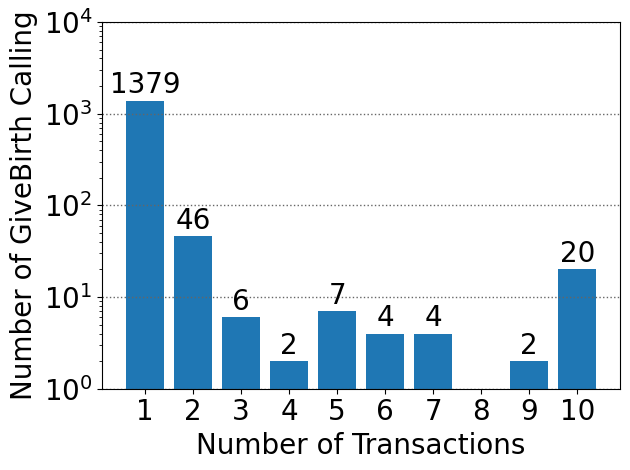

In [140]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        plt.annotate('{:.0f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 1),  # 3 points vertical offset
                    textcoords="offset points",
                    # weight="semibold",
                    ha='center', va='bottom', fontsize=20)
        

rects=plt.bar(x,y)#label为标签
autolabel(rects)

plt.grid(True, color='#666666', linestyle = ":", linewidth = "1",axis='y')
plt.xlabel('Number of Transactions', fontsize=20)
plt.ylabel('Number of GiveBirth Calling', fontsize=20)
# plt.xticks(fontsize=20)
plt.ylim(1,10000)
plt.xticks([ 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 ,10], fontsize=20)
plt.yticks(fontsize=20)
plt.yscale('log')
plt.tight_layout()

plt.savefig("/mnt/sde1/geth/nft_analyse_v1/data/giveBirth/photo/giveBirth_revenueCount.pdf",bbox_inches='tight')

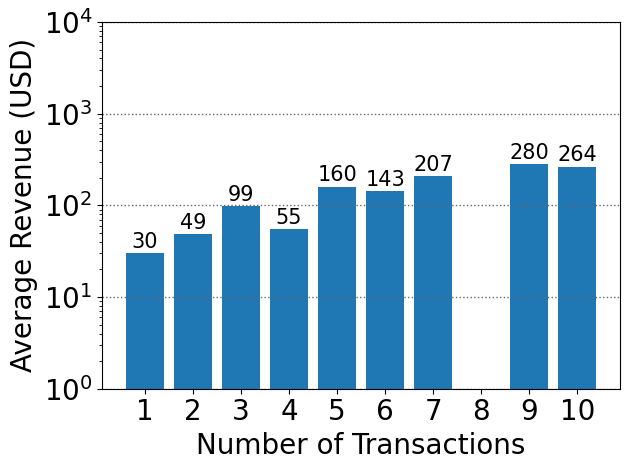

In [141]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        plt.annotate('{:.0f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 1),  # 3 points vertical offset
                    textcoords="offset points",
                    # weight="semibold",
                    ha='center', va='bottom', fontsize=15)
        

rects=plt.bar(x,averageRevenueList)#label为标签
autolabel(rects)

plt.grid(True, color='#666666', linestyle = ":", linewidth = "1",axis='y')
plt.xlabel('Number of Transactions', fontsize=20)
plt.ylabel('Average Revenue (USD)', fontsize=20)
# plt.xticks(fontsize=20)
plt.ylim(1,10000)
plt.xticks([ 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 ,10], fontsize=20)
plt.yticks(fontsize=20)
plt.yscale('log')
plt.tight_layout()

plt.savefig("/mnt/sde1/geth/nft_analyse_v1/data/giveBirth/photo/giveBirth_revenueCount.pdf",bbox_inches='tight')

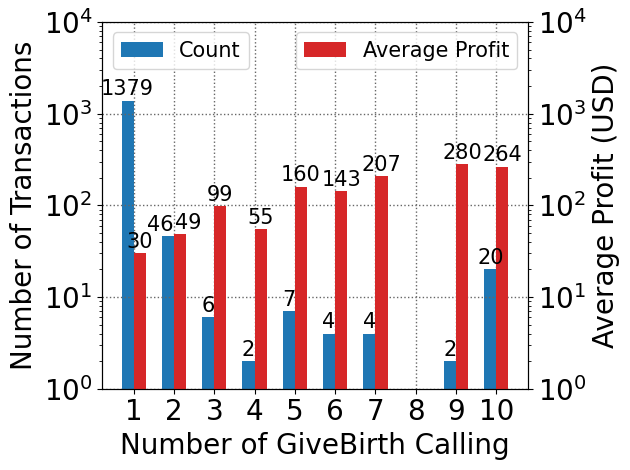

In [143]:
def autolabel1(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    i=0
    for rect in rects:
        height = rect.get_height()
        
        if i==1:
            plt.annotate('{:.0f}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2 -0.2, height),
                        xytext=(0, 1),  # 3 points vertical offset
                        textcoords="offset points",
                        # weight="semibold",
                        ha='center', va='bottom', fontsize=15)
        else:
            plt.annotate('{:.0f}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 1),  # 3 points vertical offset
                        textcoords="offset points",
                        # weight="semibold",
                        ha='center', va='bottom', fontsize=15)
        
        
        i+=1
        
def autolabel2(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    i=0
    for rect in rects:
        height = rect.get_height()
        
        if i==1:
            plt.annotate('{:.0f}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2 +0.2, height),
                        xytext=(0, 1),  # 3 points vertical offset
                        textcoords="offset points",
                        # weight="semibold",
                        ha='center', va='bottom', fontsize=15)
        else:
            plt.annotate('{:.0f}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 1),  # 3 points vertical offset
                        textcoords="offset points",
                        # weight="semibold",
                        ha='center', va='bottom', fontsize=15)
        
        
        i+=1
        
        
# 创建一个Figure对象和两个Axes对象 
fig, ax1 = plt.subplots() 
ax2 = ax1.twinx() 

width = 0.3
rects1=ax1.bar(x-1/2*width,y,width,label="Count",color='tab:blue')#label为标签
autolabel1(rects1)
ax1.set_ylabel('Number of Transactions',fontsize=20)
ax1.set_xlabel('Number of GiveBirth Calling',fontsize=20) 
ax1.set_xticks([ 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 ,10],[ 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 ,10], fontsize=20) 
# ax1.set_yticks([10,100,1000,1000],fontsize=20)
ax1.set_yscale('log')
ax1.set_ylim(1,10000)

rects2=ax2.bar(x+1/2*width,averageRevenueList,width,label="Average Profit",color="tab:red")#label为标签
autolabel2(rects2)
ax2.set_ylabel('Average Profit (USD)',fontsize=20) 
ax2.set_yscale('log')
ax2.set_ylim(1,10000)


ax1.legend(loc='upper left',fontsize=15) 
ax2.legend(loc='upper right',fontsize=15) 
ax1.grid(True, color='#666666', linestyle = ":", linewidth = "1")
plt.tight_layout()
plt.savefig("/mnt/sde1/geth/nft_analyse_v1/data/giveBirth/photo/giveBirth_count.pdf",bbox_inches='tight')

# 累计收益

In [129]:
import numpy as np
import csv    #加载csv包便于读取csv文件
import zipfile
import os
import json
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import datetime
import time
from datetime import timedelta

def date_2_timestamp(year,mon,day):
    tempString=str(year)+"-"+str(mon)+"-"+str(day)
    tempTime=time.strptime(tempString, "%Y-%m-%d")
    return time.mktime(tempTime)

def timestamp_2_date(un_time):
    return datetime.datetime.fromtimestamp(un_time)


def timestamp_removeDay_reduce(temp_timestamp):
    temp_date=timestamp_2_date(temp_timestamp)
    temp_timestamp=date_2_timestamp(temp_date.year,temp_date.month,1)
    return temp_timestamp

def timestamp_removeHour_reduce(temp_timestamp):
    temp_date=timestamp_2_date(temp_timestamp)
    temp_timestamp=date_2_timestamp(temp_date.year,temp_date.month,temp_date.day)
    return temp_timestamp

def timestamp_removeDay_add(temp_timestamp):
    temp_date=timestamp_2_date(temp_timestamp)
    if temp_date.month==12:
        return date_2_timestamp(temp_date.year+1,1,1)
    else:
        return date_2_timestamp(temp_date.year,temp_date.month+1,1)
    
def date_removeDay_reduce(temp_date):
    temp_timestamp=date_2_timestamp(temp_date.year,temp_date.month,1)
    return timestamp_2_date(temp_timestamp)

def date_removeHour_reduce(temp_date):
    temp_timestamp=date_2_timestamp(temp_date.year,temp_date.month,temp_date.day)
    return timestamp_2_date(temp_timestamp)

def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

# 返回从最小到最大之间经过的时间戳，间隔为一个月
def max_min_2_timestampList(minDate,maxDate):    
    resList=[]
    resMap={}
    for single_date in daterange(minDate, maxDate):
        temp_date=date_removeDay_reduce(single_date)
        temp_timestamp=date_2_timestamp(temp_date.year,temp_date.month,temp_date.day)
        resMap[temp_timestamp]=1 

    for key in resMap.keys():
        resList.append(key)
    
    # print(resList)
    return sorted(resList)

# 返回从最小到最大之间经过的时间戳，间隔为一天

def max_min_2_timestampList_day(minDate,maxDate):    
    resList=[]
    resMap={}
    for single_date in daterange(minDate, maxDate):
        # temp_date=date_removeHour_reduce(single_date)
        temp_timestamp=date_2_timestamp(single_date.year,single_date.month,single_date.day)
        resMap[temp_timestamp]=1 

    for key in resMap.keys():
        resList.append(key)
    
    # print(resList)
    return sorted(resList)


def timestamp_2_string(temp_timestamp):
    temp_date=datetime.datetime.fromtimestamp(temp_timestamp)
    if temp_date.month<10:
        tempMonth="0"+str(temp_date.month)
    else:
        tempMonth=str(temp_date.month)
    return str(temp_date.year)+"-"+tempMonth

import calendar
def timestamp_2_string_ymd(temp_timestamp):
    temp_date=datetime.datetime.fromtimestamp(temp_timestamp)
    # if temp_date.month<10:
    #     tempMonth="0"+str(temp_date.month)
    # else:
    #     tempMonth=str(temp_date.month)
        
    tempMonth=calendar.month_abbr[int(temp_date.month)]
        
    if temp_date.day<10:
        tempDay="0"+str(temp_date.day)
    else:
        tempDay=str(temp_date.day)
    return tempMonth+"-"+tempDay+"-"+str(temp_date.year)

len of unequal zero:  204
total len:  451


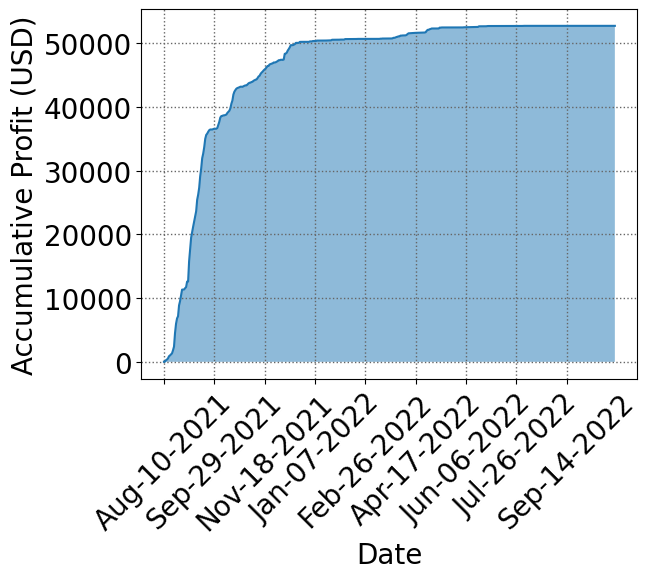

In [131]:
df=pd.read_csv("/mnt/sde1/geth/nft_analyse_v1/data/giveBirth/csv/givebirth_withRevenue.csv")

tx_map={}
# test={}
for index,row in df.iterrows():
    transactionHash=row["transactionHash"]
    timestamp=row["timestamp"]
    totalReward=row["revenue_dollar"]
    # print(timestamp)
    timestamp=timestamp_removeHour_reduce(timestamp)
    # print(timestamp)
    # break
    # timestamp=timestamp_removeDay_reduce(timestamp)
    tx_map[transactionHash]={"timestamp":timestamp,"totalReward":totalReward}
    
    # test[timestamp]=1
    
timestamp_map = {}
for key,value in tx_map.items():
    timestamp=value["timestamp"]
    totalReward=value["totalReward"]
    
    if timestamp not in timestamp_map:
        timestamp_map[timestamp]=0
    timestamp_map[timestamp]+=totalReward
    
list_key=[]
list_value=[]
minDate=datetime.datetime.fromtimestamp( min(df["timestamp"]) )
maxDate=datetime.datetime.fromtimestamp( max(df["timestamp"]) )

for tempTimestamp in max_min_2_timestampList_day(minDate,maxDate):
    if tempTimestamp not in timestamp_map:
        timestamp_map[tempTimestamp]=0
    
    list_key.append(timestamp_2_string_ymd(tempTimestamp))
    list_value.append( timestamp_map[tempTimestamp] )

count=0
for key,value in timestamp_map.items():
    if value!=0:
        count+=1
print("len of unequal zero: ",count)
print("total len: ",len(timestamp_map))
    
# print("list_key",list_key)
# print("list_value",list_value)

list_value=np.cumsum(list_value)
minItem=0
for i in range(len(list_value)):
    if list_value[i]>minItem:
        minItem=list_value[i]
        break
    
for i in range(len(list_value)):
    if list_value[i]==0:
        list_value[i]=minItem
 
num=50
x=[]
x_key=[]
for i in range(len(list_key)):
    if i%50==0:
        x.append(i)
        x_key.append(list_key[i])

plt.plot(list_value)
plt.xticks(x,labels=x_key,fontsize=20,rotation=45)
plt.yticks(fontsize=20)
plt.grid(True, color='#666666', linestyle = ":", linewidth = "1")
plt.fill_between(list_key, 0, list_value, alpha=0.5)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Accumulative Profit (USD)',fontsize=20)
plt.savefig("/mnt/sde1/geth/nft_analyse_v1/data/giveBirth/photo/giveBirth_revenue.pdf",bbox_inches='tight')

# 数量

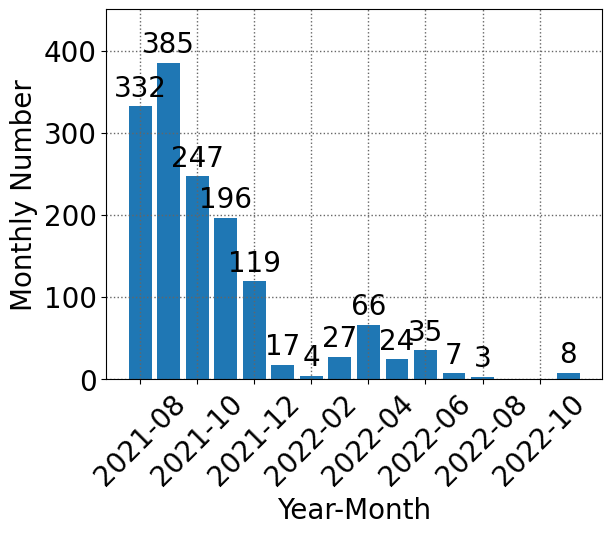

In [144]:
df=pd.read_csv("/mnt/sde1/geth/nft_analyse_v1/data/giveBirth/csv/givebirth_withRevenue.csv")

tx_map={}

for index,row in df.iterrows():
    transactionHash=row["transactionHash"]
    timestamp=row["timestamp"]
    timestamp=timestamp_removeDay_reduce(timestamp)
    tx_map[transactionHash]=timestamp
    
timestamp_Map = {}
for key,temp_timestamp in tx_map.items():
    if temp_timestamp not in timestamp_Map:
        timestamp_Map[temp_timestamp]=0
    timestamp_Map[temp_timestamp]+=1
    
list_key=[]
list_value=[]
minDate=datetime.datetime.fromtimestamp( min(df["timestamp"]) )
maxDate=datetime.datetime.fromtimestamp( max(df["timestamp"]) )

for tempTimestamp in max_min_2_timestampList(minDate,maxDate):
    if tempTimestamp not in timestamp_Map:
        timestamp_Map[tempTimestamp]=0
    
    list_key.append(timestamp_2_string(tempTimestamp))
    list_value.append( timestamp_Map[tempTimestamp] )
    
rects=plt.bar(list_key,list_value)
plt.ylim(0,450)
plt.yticks(fontsize=20)
plt.ylabel('Monthly Number', fontsize=20)
plt.xlabel('Year-Month', fontsize=20)
plt.grid(True, color='#666666', linestyle = ":", linewidth = "1")

tempX=[]
tempLabel=[]
for i in range(0,len(list_key),2):
    tempX.append(i)
    tempLabel.append(list_key[i])
plt.xticks(tempX,labels=tempLabel,fontsize=20,rotation=45)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        if height==0:
            continue
        plt.annotate('{:.0f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    # weight="semibold",
                    ha='center', va='bottom', fontsize=20)
        
autolabel(rects)


plt.savefig("/mnt/sde1/geth/nft_analyse_v1/data/giveBirth/photo/giveBirth_num.pdf",bbox_inches='tight')